In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm
from typing import Tuple, List
from scipy.stats import ks_2samp, mannwhitneyu
from utils import *
from lsa import *
from matplotlib.colors import LinearSegmentedColormap


In [17]:
def get_stat_scores(stat_func, df):
  """compare the cipher distributions if each character using the given stat_func"""
  n_cols = len(df.columns)
  stat_table = np.zeros((2, n_cols, n_cols))
  for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
      stat_score = stat_func(df[col1].values, df[col2].values)
      stat_table[[0, 1], i, j] = stat_score
  return stat_table

def test_all(chars_range: range, keys_range: range, cipher_func) -> pd.DataFrame:
  """generate ciphers for all characters with all keys and return as a table"""
  df = pd.DataFrame(columns=chars_range, dtype=int)
  for char_idx in tqdm(chars_range):
    for key in keys_range:
      cipher = cipher_func(key, char_idx)
      df.loc[key, char_idx] = cipher
  return df

In [56]:
def dist_analysis(col_names, stat_table):
  """plot the statisic for comparing character-pair distribution"""
  p_accepted = stat_table[1].copy()
  p_accepted[p_accepted <= 0.05] = 0
  p_accepted[p_accepted > 0.05] = 1
  colors = ["darkred", "#0c315f"] 
  cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

  fig, axes = plt.subplots(1, 3, figsize=(35, 10))

  sns.heatmap(np.around(stat_table[0], 2), cmap="RdBu", square=True, cbar_kws={"shrink": .85}, annot=True, ax=axes[0])  # statistic value
  sns.heatmap(np.around(stat_table[1], 2), cmap="RdBu", square=True, vmin=0, vmax=1, cbar_kws={"shrink": .85}, annot=True, ax=axes[1])  # p values
  sns.heatmap(p_accepted, cmap=cmap, square=True, vmin=0, vmax=1, cbar_kws={"shrink": .85}, annot=True, ax=axes[2])

  colorbar = axes[2].collections[0].colorbar
  colorbar.set_ticks([0,1])
  colorbar.set_ticklabels(['p < 0.05', 'p >= 0.05'])

  for ax in axes:
    ax.set_xticklabels(col_names)
    ax.set_yticklabels(col_names)

  fig.show()

def plot_hists(df: pd.DataFrame):
  """plot the histograms for each character"""
  group_labels = df.columns
  fig = ff.create_distplot(df.values.T, group_labels=group_labels, show_rug=False)
  fig.show()

In [52]:
min_char, max_char = 1, 10
min_key, max_key = 1_000, 10_000

In [53]:
df_lsa = test_all(range(min_char, max_char), range(min_key, max_key), get_cipher_lsa)

100%|██████████| 9/9 [00:05<00:00,  1.50it/s]


In [43]:
df_lsa_bw = test_all(range(min_char, max_char), range(min_key, max_key), get_cipher_lsa_bw)

100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


In [44]:
# df_xor = test_all(range(10), range(1_000, 10_000), get_cipher_xor)

In [45]:
# plot_hists(df_lsa)

In [46]:
# plot_hists(df_lsa_bw)

In [47]:
# plot_hists(df_xor)

In [54]:
stat_func = ks_2samp  # mannwhitneyu # ks_2samp


/tmp/ipykernel_68770/3185589504.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


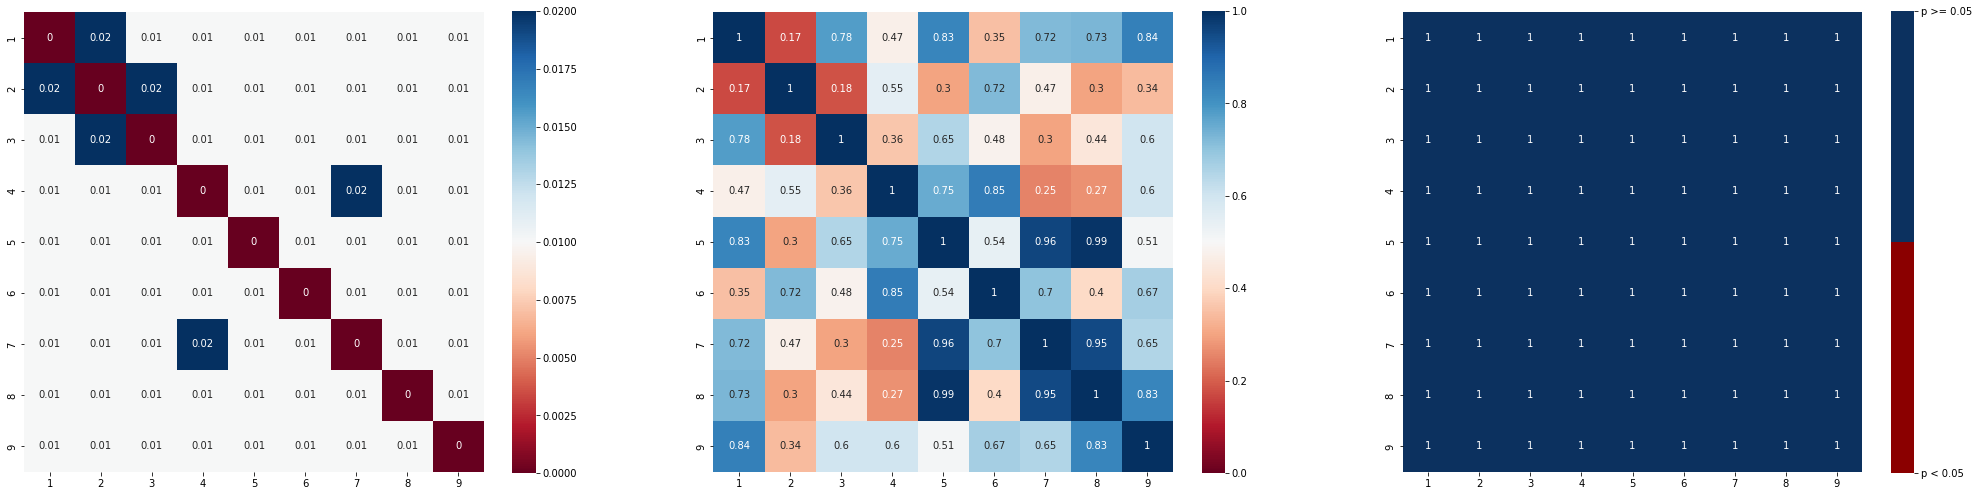

In [57]:
stat_table = get_stat_scores(stat_func, df_lsa)
dist_analysis(df_lsa.columns, stat_table)

In [58]:
ks_2samp(df_lsa[5].values, df_lsa[8].values)

KstestResult(statistic=0.006666666666666667, pvalue=0.9882691849993137)

In [13]:
df_lsa[4]

1000     749.0
1001     674.0
1002     415.0
1003     702.0
1004     947.0
         ...  
9995     284.0
9996    7927.0
9997    9281.0
9998    6027.0
9999    3463.0
Name: 4, Length: 9000, dtype: float64

In [ ]:
dist_analysis(df_lsa_bw, stat_func)

In [ ]:
# dist_analysis(df_xor, stat_func)